# Minimax

> O algoritmo Minimax é um método utilizado em jogos de decisão com oponente,como jogos de tabuleiro (por exemplo, xadrez, damas, tic-tac-toe) para determinar a melhor jogada possível para um jogador, levando em consideração as jogadas do oponente. O objetivo do Minimax é minimizar a possível perda máxima (daí o nome "Minimax") ao considerar todas as jogadas possíveis até o final do jogo.

> O algoritmo opera de forma recursiva e utiliza uma abordagem de busca em árvore para avaliar todas as possíveis sequências de jogadas, desde o estado atual do jogo até estados terminais (vitória, derrota ou empate). Cada nó na árvore representa um estado do jogo, e as arestas representam as possíveis jogadas.

> O processo básico do algoritmo Minimax envolve dois jogadores: o "Max" (que tenta maximizar seu resultado) e o "Min" (que tenta minimizar o resultado do Max). O algoritmo assume que ambos os jogadores jogam de maneira ótima, ou seja, escolhem a melhor jogada possível.

> O jogador Max procura maximizar o valor do nó atual (o valor é associado à utilidade, como ganhar, perder ou empatar).
O jogador Min procura minimizar o valor do nó atual.
A recursividade do algoritmo ocorre ao explorar as possíveis jogadas em profundidade na árvore de jogo, alternando entre jogadores Max e Min. A avaliação dos nós terminais é feita com uma função de utilidade que atribui valores aos estados finais (por exemplo, +1 para vitória, -1 para derrota e 0 para empate).

> O Minimax, apesar de ser uma abordagem eficaz para jogos de decisão com oponente, pode ser intensivo em termos computacionais, especialmente para jogos mais complexos. Algumas otimizações e técnicas, como a poda alfa-beta, são frequentemente usadas para reduzir a complexidade computacional do algoritmo.


In [ ]:
from google.colab import output

# Minimax
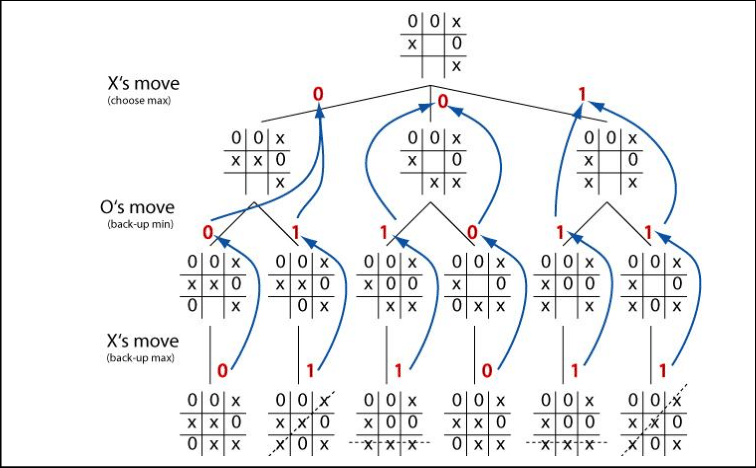

In [ ]:
from google.colab import output
# Fução para criar tabuleiro vazio
def criaTabuleiro():
  return [[' ', ' ', ' '],[' ', ' ', ' '],[' ', ' ', ' ']]

# Função para Exibir o tabuleiro
def imprimeTabuleiro(tabuleiro):
  print('  1 2 3')
  for i in range(3):
    print('%d' % (i+1), *tabuleiro[i],'', sep = '|')

# Função que testa se é um nó terminal
# 0 -> não é terminal
# 1 -> vitória de min [o]
# 2 -> empate
# 3 -> vitória de max [x]
def testeTerminal(tabuleiro):
  # testa diagonal 1
  if tabuleiro[0][0]==tabuleiro[1][1] and tabuleiro[1][1]==tabuleiro[2][2]:
    if(tabuleiro[0][0]=='x'):
      return 3
    elif(tabuleiro[0][0]=='o'):
      return 1
  # testa diagonal 2
  if tabuleiro[2][0]==tabuleiro[1][1] and tabuleiro[1][1]==tabuleiro[0][2]:
    if(tabuleiro[2][0]=='x'):
      return 3
    elif(tabuleiro[2][0]=='o'):
      return 1
  # testa linhas e colunas
  for i in range(3):
    # testa linhas
    if tabuleiro[i][0]==tabuleiro[i][1] and tabuleiro[i][1]==tabuleiro[i][2]:
      if(tabuleiro[i][0]=='x'):
        return 3
      elif(tabuleiro[i][0]=='o'):
        return 1
    # testa colunas
    if tabuleiro[0][i]==tabuleiro[1][i] and tabuleiro[1][i]==tabuleiro[2][i]:
      if(tabuleiro[0][i]=='x'):
        return 3
      elif(tabuleiro[0][i]=='o'):
        return 1
  # testa a ocorrência do empate
  empate = True
  for i in range(3):
    if(' ' in tabuleiro[i]):
      empate = False
  if(empate):
    return 2
  # não é terminal
  return 0

In [ ]:
# Função para Max
def acaoMax(tabuleiro):
  # veritica se é terminal e, caso seja, retorna utilidade e estado terminal
  terminal = testeTerminal(tabuleiro)
  if(terminal):
    return [terminal, tabuleiro]
  # criação da lista de ações possíveis
  acoes = []
  for i in range(3):
    for j in range(3):
      if(tabuleiro[i][j]==' '):
        copia = [list(tabuleiro[0]),list(tabuleiro[1]), list(tabuleiro[2])]
        copia[i][j] = 'x'
        acoes.append([0, copia])
  # para cada acão "passa" jogada para min
  for i in range(len(acoes)):
    acoes[i][0] = acaoMin(acoes[i][1])[0] # usa utilidade retornada
  # retorna a melhor acão para max
  return max(acoes)

# Função para Min
def acaoMin(tabuleiro):
  # veritica se é terminal e, caso seja, retorna utilidade e estado terminal
  terminal = testeTerminal(tabuleiro)
  if(terminal):
    return [terminal, tabuleiro]
  # criação da lista de ações possíveis
  acoes = []
  for i in range(3):
    for j in range(3):
      if(tabuleiro[i][j]==' '):
        copia = [list(tabuleiro[0]),list(tabuleiro[1]), list(tabuleiro[2])]
        copia[i][j] = 'o'
        acoes.append([0, copia])
  # para cada acão "passa" jogada para max
  for i in range(len(acoes)):
    acoes[i][0] = acaoMax(acoes[i][1])[0]
  # retorn a melhor ação para min
  return min(acoes)


In [ ]:
# Função Principal
def principal():
  cpuPrimeiro = True
  while(True):
    print('1-CPU 1 x CPU 2\n2-Jogador x CPU\n3-Jogador 1 x Jogador 2')
    op = int(input('4-Sair\nOpção: '))
    vezCPU = True
    if(op>=1 and op<=3):
      while(True):
        tabuleiro = criaTabuleiro()
        output.clear()
        imprimeTabuleiro(tabuleiro)
        vezPrimeiro = True
        while(not testeTerminal(tabuleiro)):
          if(vezCPU and (op == 1 or op == 2)):
            if(vezPrimeiro and cpuPrimeiro):
              aux = acaoMax(tabuleiro)
              tabuleiro = aux[1]
            elif(not vezPrimeiro):
              aux = acaoMin(tabuleiro)
              tabuleiro = aux[1]
          if(op == 2 and not vezCPU or op == 3):
            while(True):
              if(vezPrimeiro and (op == 3 or not cpuPrimeiro)):
                print('Jogador [x]: ')
                valor = 'x'
              else:
                print('Jogador [o]: ')
                valor = 'o'
              linha = int(input('linha: '))
              coluna = int(input('coluna: '))
              if(linha>0 and linha <4 and coluna>0 and coluna <4):
                if(tabuleiro[linha-1][coluna-1]==' '):
                  tabuleiro[linha-1][coluna-1] = valor
                  break
          if(op == 2):
            vezCPU = not vezCPU
          output.clear()
          imprimeTabuleiro(tabuleiro)
          vezPrimeiro = not vezPrimeiro
        if(op == 2):
          cpuPrimeiro = not cpuPrimeiro
        else:
          cpuPrimeiro = True
        vezCPU = cpuPrimeiro

        resultado = testeTerminal(tabuleiro)
        if(resultado == 1):
          print('Vitória do [o]!')
        elif(resultado == 3):
          print('Vitória do [x]!')
        else:
          print('Empate!')
        while(True):
          saida = input('Jogar novamente?[sim ou não]')
          saida = saida.lower()
          if(saida == 'sim' or saida == 'não'):
            break
        if(saida=='não'):
          break
      output.clear()
    else:
      return

# Execução do programa
principal()

1-CPU 1 x CPU 2
2-Jogador x CPU
3-Jogador 1 x Jogador 2
